# 1. Import thư viện

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from google.colab import files
uploaded = files.upload()

Saving KDDTrain+.txt to KDDTrain+.txt


# 2. Đọc dataset

In [3]:
df_0 = pd.read_csv("KDDTrain+.txt")
df= df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


2.1 Thêm cột

In [4]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
df.columns = columns

In [5]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


2.2 Thông tin dữ liệu

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [7]:
# Thống kê định lượng
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [8]:
# Thống kê định tính
df.describe(include='object').T

,count,unique,top,freq
protocol_type,125972,3,tcp,102688
service,125972,70,http,40338
flag,125972,11,SF,74944
attack,125972,23,normal,67342


# 3. Làm sạch dữ liệu

3.1. Kiểm tra giá trị NULL

In [9]:
null_rows = df.isnull().any(axis=1).sum()
null_rows

0

Dữ liệu không chứa giá trị rỗng nào

3.2. Kiểm tra trùng lặp

In [10]:
df.duplicated().any()

False

Dữ liệu không bị trùng lặp

In [11]:
# Hàm trả về số lượng dòng,cột trong dataset
df.shape

(125972, 43)

3.4. Phân loại cột attack

In [12]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [13]:
#Thêm cột attack type
df['Attack Type'] = df.attack.apply(lambda r:attacks_types[r])
df.drop('attack', axis = 1, inplace = True)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Attack Type
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


# 4. Tiền xử lý dữ liệu


In [14]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'Attack Type'], dtype='object')

In [15]:
# chuyển đổi protocol_type
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [16]:
# chuyển đổi flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [17]:
# Drop cột service
df.drop('service', axis = 1, inplace = True)

In [18]:
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Attack Type
0,0,2,0,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
1,0,1,1,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
2,0,1,0,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
3,0,1,0,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
4,0,1,2,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,1,0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20,dos
125968,8,2,0,105,145,0,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21,normal
125969,0,1,0,2231,384,0,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18,normal
125970,0,1,1,0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20,dos


# loại bỏ đặc trưng phụ thuộc

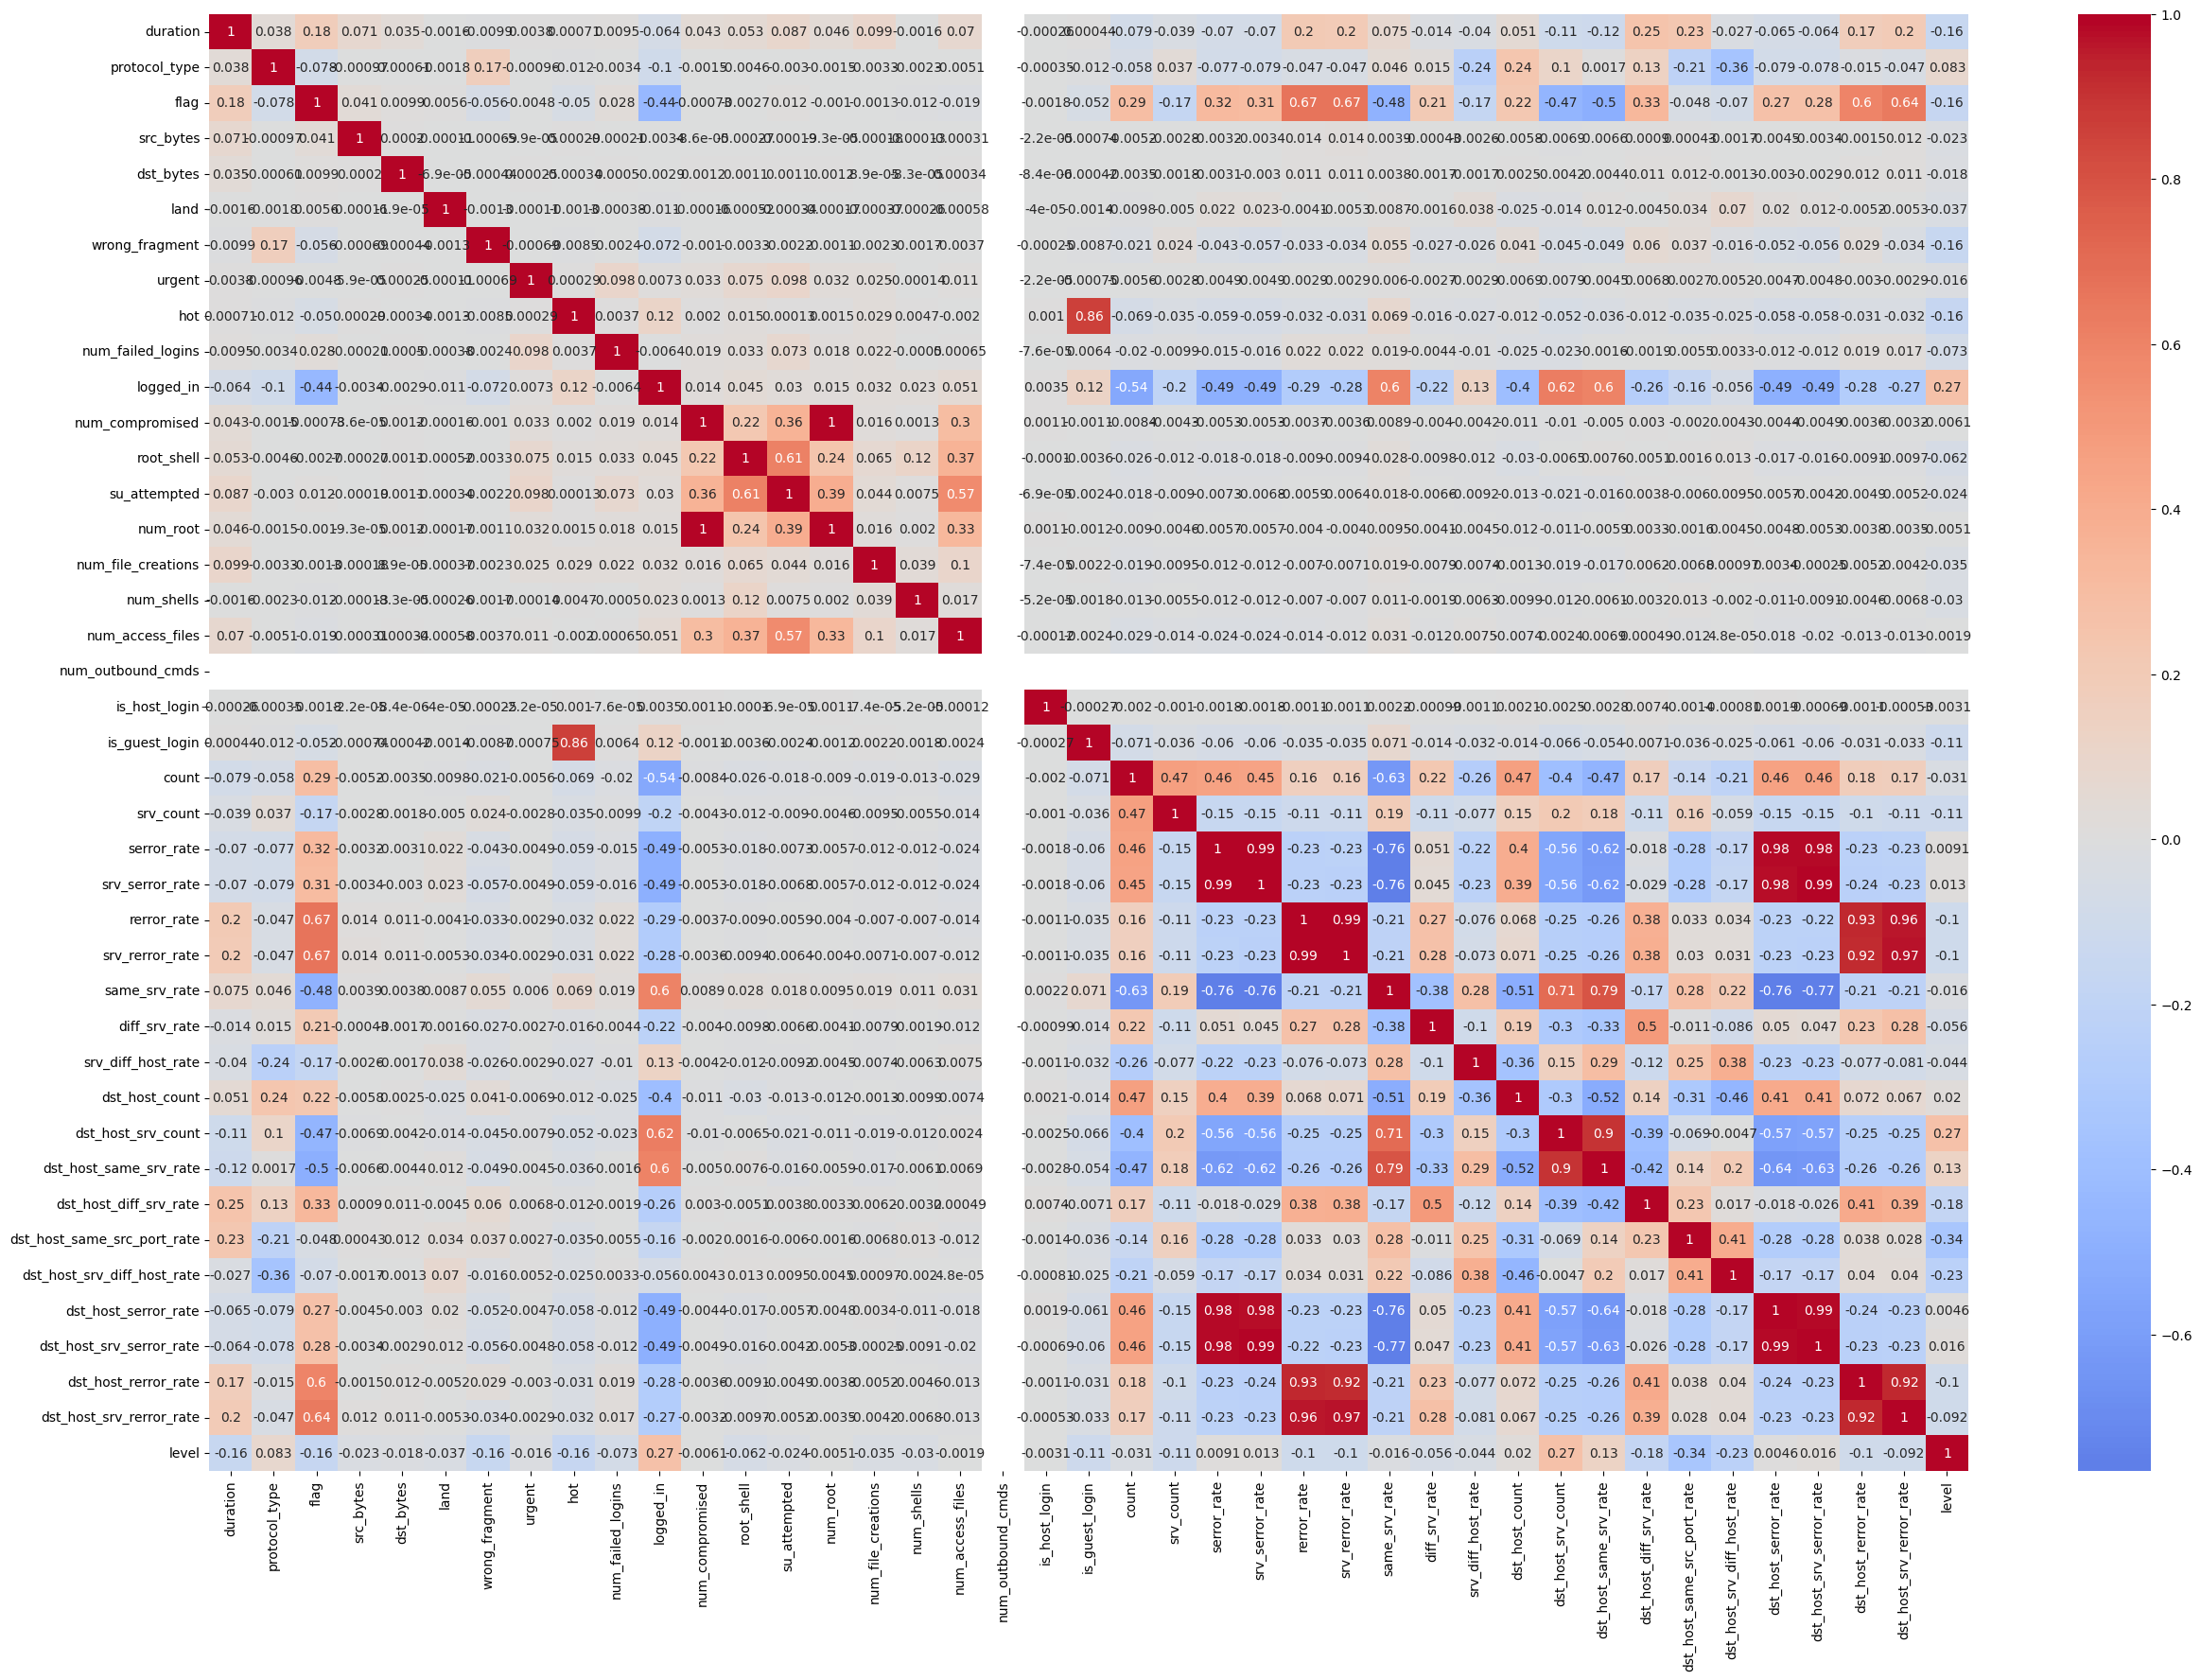

In [19]:
df_numeric = df.select_dtypes(include=[np.number])

# Tính toán ma trận tương quan
corr_matrix = df_numeric.corr(method='pearson')

# Tạo biểu đồ heatmap
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

Xử lý ngoại lệ

In [20]:
df.drop('num_root', axis = 1, inplace = True)

df.drop('is_guest_login', axis = 1, inplace = True)

df.drop('dst_host_srv_count', axis = 1, inplace = True)

df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

df.drop('dst_host_serror_rate', axis = 1, inplace = True)

df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)


In [21]:
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,level,Attack Type
0,0,2,0,146,0,0,0,0,0,0,...,0.0,0.08,0.15,0.00,255,0.60,0.88,0.00,15,normal
1,0,1,1,0,0,0,0,0,0,0,...,0.0,0.05,0.07,0.00,255,0.05,0.00,0.00,19,dos
2,0,1,0,232,8153,0,0,0,0,0,...,0.0,1.00,0.00,0.00,30,0.00,0.03,0.04,21,normal
3,0,1,0,199,420,0,0,0,0,0,...,0.0,1.00,0.00,0.09,255,0.00,0.00,0.00,21,normal
4,0,1,2,0,0,0,0,0,0,0,...,1.0,0.16,0.06,0.00,255,0.07,0.00,0.00,21,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,1,0,0,0,0,0,0,0,...,0.0,0.14,0.06,0.00,255,0.06,0.00,0.00,20,dos
125968,8,2,0,105,145,0,0,0,0,0,...,0.0,1.00,0.00,0.00,255,0.01,0.01,0.00,21,normal
125969,0,1,0,2231,384,0,0,0,0,0,...,0.0,1.00,0.00,0.00,255,0.06,0.00,0.00,18,normal
125970,0,1,1,0,0,0,0,0,0,0,...,0.0,0.06,0.05,0.00,255,0.05,0.00,0.00,20,dos


# 5. Xây dựng model

5.1 Naive Bayes

In [24]:
# Thuật toán Native Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import time

In [25]:
df_copy = df.copy()
X = df_copy.drop(["Attack Type"], axis=1)
y = df_copy["Attack Type"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'fit_prior': [True, False]
}
# Khởi tạo và huấn luyện mô hình Native Bayes
model = MultinomialNB()

grid_search_nb = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=param_grid_nb,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search_nb.fit(X_train, y_train)
# Dự đoán kết quả trên tập kiểm tra bằng mô hình đã đào tạo
nb_predictions = grid_search_nb.predict(X_test)

# In ra thông số tốt nhất và kết quả đạt được
print("Mô hình tốt nhất:", grid_search_nb.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mô hình tốt nhất: {'alpha': 0.1, 'fit_prior': True}


In [26]:
# Đánh giá mô hình
accuracy_nb = accuracy_score(y_test, nb_predictions)
report = classification_report(y_test, nb_predictions)
print("Accuracy: ", accuracy_nb)
print("Report: ", report)

Accuracy:  0.41627857747671465
Report:                precision    recall  f1-score   support

         dos       0.54      0.98      0.70     13941
      normal       0.98      0.10      0.19     20014
       probe       0.00      0.00      0.00      3526
         r2l       0.03      0.08      0.04       291
         u2r       0.00      0.70      0.00        20

    accuracy                           0.42     37792
   macro avg       0.31      0.37      0.19     37792
weighted avg       0.72      0.42      0.36     37792



In [27]:
import pandas as pd

# Lấy kết quả từ GridSearchCV
cv_results = grid_search_nb.cv_results_

# Tạo DataFrame với các cột cần thiết
results_df = pd.DataFrame({
    'mean_test_score': cv_results['mean_test_score'],
    'std_test_score': cv_results['std_test_score'],
    'param_alpha': cv_results['param_alpha'],
    'param_fit_prior': cv_results['param_fit_prior']
})

# Hiển thị DataFrame
print("Kết quả Grid Search:")
print(results_df)

# Sắp xếp theo độ chính xác trung bình (giảm dần)
results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)
print("\nTop 5 kết quả tối ưu:")
print(results_df_sorted.head())


Kết quả Grid Search:
   mean_test_score  std_test_score  param_alpha  param_fit_prior
0         0.413019        0.005733          0.1             True
1         0.412406        0.005812          0.1            False
2         0.412962        0.005740          0.5             True
3         0.412304        0.005805          0.5            False
4         0.412917        0.005745          1.0             True
5         0.412293        0.005804          1.0            False
6         0.412667        0.005709          5.0             True
7         0.412112        0.005803          5.0            False
8         0.412463        0.005751         10.0             True
9         0.411839        0.005751         10.0            False

Top 5 kết quả tối ưu:
   mean_test_score  std_test_score  param_alpha  param_fit_prior
0         0.413019        0.005733          0.1             True
2         0.412962        0.005740          0.5             True
4         0.412917        0.005745          1.

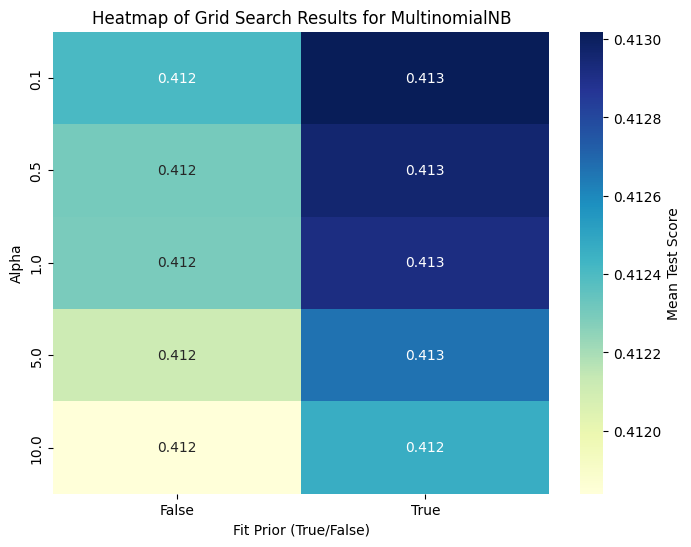

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame từ kết quả GridSearchCV
cv_results = grid_search_nb.cv_results_
results_df = pd.DataFrame({
    'mean_test_score': cv_results['mean_test_score'],
    'param_alpha': cv_results['param_alpha'],
    'param_fit_prior': cv_results['param_fit_prior']
})

# Pivot dữ liệu để phù hợp với heatmap
pivot_table = results_df.pivot_table(
    index='param_alpha',
    columns='param_fit_prior',
    values='mean_test_score'
)

# Tạo Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".3f",
    cmap='YlGnBu',
    cbar_kws={'label': 'Mean Test Score'}
)
plt.title('Heatmap of Grid Search Results for MultinomialNB')
plt.xlabel('Fit Prior (True/False)')
plt.ylabel('Alpha')
plt.show()


<ipython-input-29-70501c6e2c04>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


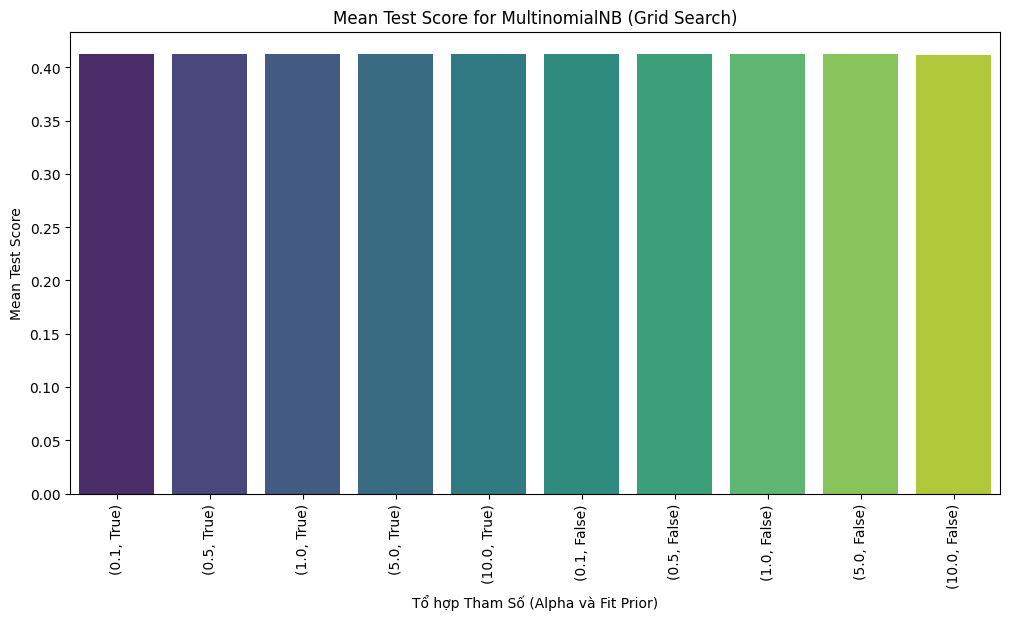

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame từ kết quả GridSearchCV
cv_results = grid_search_nb.cv_results_
results_df = pd.DataFrame({
    'mean_test_score': cv_results['mean_test_score'],
    'param_alpha': cv_results['param_alpha'],
    'param_fit_prior': cv_results['param_fit_prior']
})

# Sắp xếp theo độ chính xác trung bình (giảm dần)
results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)

# Biểu đồ cột cho mean_test_score
plt.figure(figsize=(12, 6))
sns.barplot(
    x=range(len(results_df_sorted)),  # Số lượng các tổ hợp tham số
    y='mean_test_score',  # Điểm số trung bình
    data=results_df_sorted,
    palette='viridis'  # Chọn bảng màu
)

# Thêm tiêu đề và nhãn
plt.title('Mean Test Score for MultinomialNB (Grid Search)')
plt.xlabel('Tổ hợp Tham Số (Alpha và Fit Prior)')
plt.ylabel('Mean Test Score')

# Đánh dấu các tham số trên trục X
plt.xticks(
    ticks=range(len(results_df_sorted)),
    labels=results_df_sorted.apply(lambda x: f"({x['param_alpha']}, {x['param_fit_prior']})", axis=1),
    rotation=90
)

# Hiển thị biểu đồ
plt.show()



5.2 Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [31]:
df_copy = df.copy()
X = df_copy.drop(["Attack Type"], axis=1)
y = df_copy["Attack Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

# Tạo một lưới các giá trị tham số cần thử
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

model = DecisionTreeClassifier(random_state=0)

# Huấn luyện mô hình và tìm tham số tốt nhất

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


In [32]:
# Huấn luyện mô hình với các tham số tối ưu
best_model.fit(X_train, y_train)

# Đánh giá mô hình
clfd_predict = best_model.predict(X_test)
clfd_score = metrics.accuracy_score(y_test,clfd_predict)
print("Độ chính xác:" ,clfd_score)
print("Báo cáo: ",metrics.classification_report(y_test,clfd_predict))

Độ chính xác: 0.99714240355612
Báo cáo:                precision    recall  f1-score   support

         dos       1.00      1.00      1.00      4543
      normal       1.00      1.00      1.00      6770
       probe       0.99      0.99      0.99      1176
         r2l       0.90      0.98      0.94       107
         u2r       0.00      0.00      0.00         2

    accuracy                           1.00     12598
   macro avg       0.78      0.79      0.79     12598
weighted avg       1.00      1.00      1.00     12598



In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy thông tin kết quả từ Grid Search
results = grid_search.cv_results_

# Tạo DataFrame từ kết quả
results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],  # Độ chính xác trung bình từ cross-validation
    'param_max_depth': results['param_max_depth'],
    'param_min_samples_split': results['param_min_samples_split'],
    'param_criterion': results['param_criterion']
})

# Hiển thị dữ liệu kết quả
print(results_df)

    mean_test_score  param_max_depth  param_min_samples_split param_criterion
0          0.963757                3                        2            gini
1          0.963757                3                        5            gini
2          0.963757                3                       10            gini
3          0.984079                5                        2            gini
4          0.984079                5                        5            gini
5          0.984079                5                       10            gini
6          0.993208                7                        2            gini
7          0.993235                7                        5            gini
8          0.993182                7                       10            gini
9          0.997310               10                        2            gini
10         0.997354               10                        5            gini
11         0.997319               10                       10   

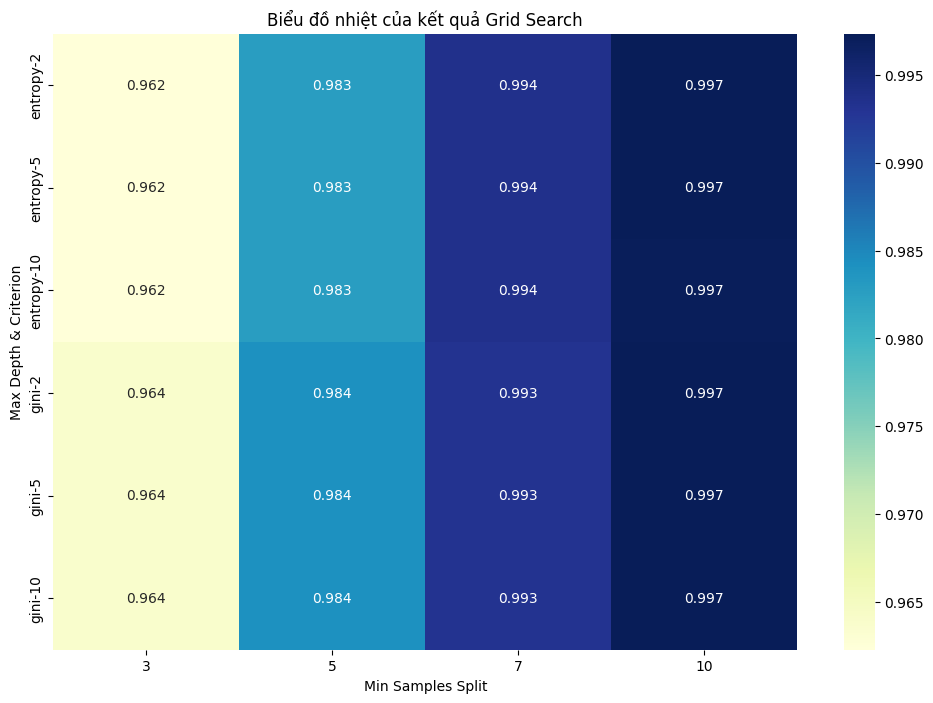

In [34]:
results_df['criterion'] = results_df['param_criterion']

# Pivot dữ liệu để phù hợp với một heatmap
combined_heatmap = results_df.pivot_table(
    index=['criterion', 'param_min_samples_split'],
    columns='param_max_depth',
    values='mean_test_score'
)

# Tạo Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combined_heatmap, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Biểu đồ nhiệt của kết quả Grid Search")
plt.xlabel("Min Samples Split")
plt.ylabel("Max Depth & Criterion")
plt.show()

<ipython-input-35-9ea55eb7fa99>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


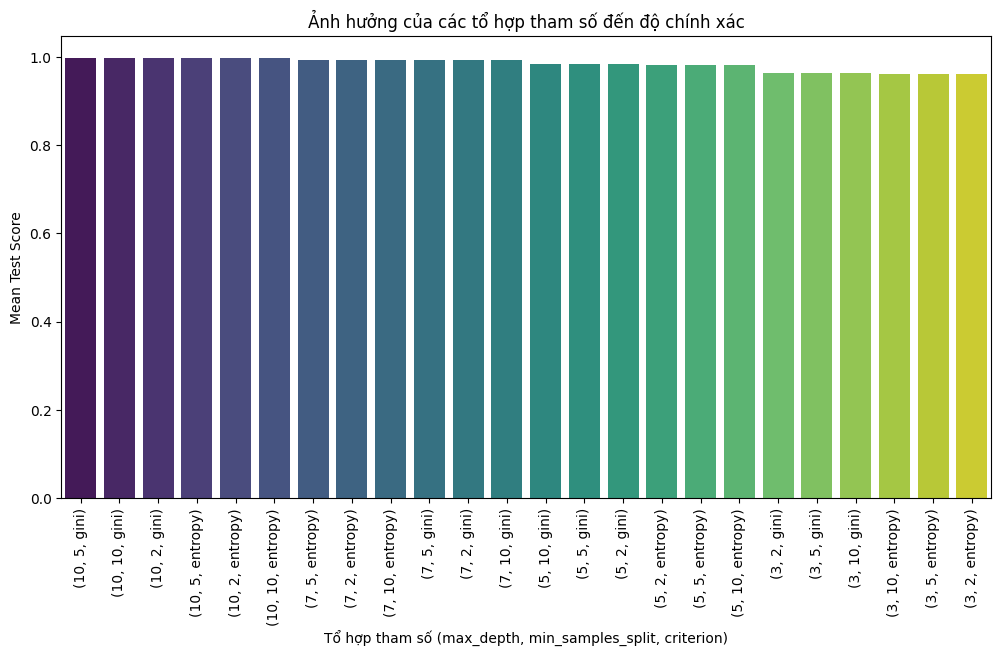

In [35]:
# Sắp xếp lại dữ liệu theo độ chính xác
sorted_results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(
    x=range(len(sorted_results_df)),
    y=sorted_results_df['mean_test_score'],
    palette='viridis'
)
plt.xticks(
    range(len(sorted_results_df)),
    sorted_results_df.apply(lambda x: f"({x['param_max_depth']}, {x['param_min_samples_split']}, {x['param_criterion']})", axis=1),
    rotation=90
)
plt.title("Ảnh hưởng của các tổ hợp tham số đến độ chính xác")
plt.xlabel("Tổ hợp tham số (max_depth, min_samples_split, criterion)")
plt.ylabel("Mean Test Score")
plt.show()

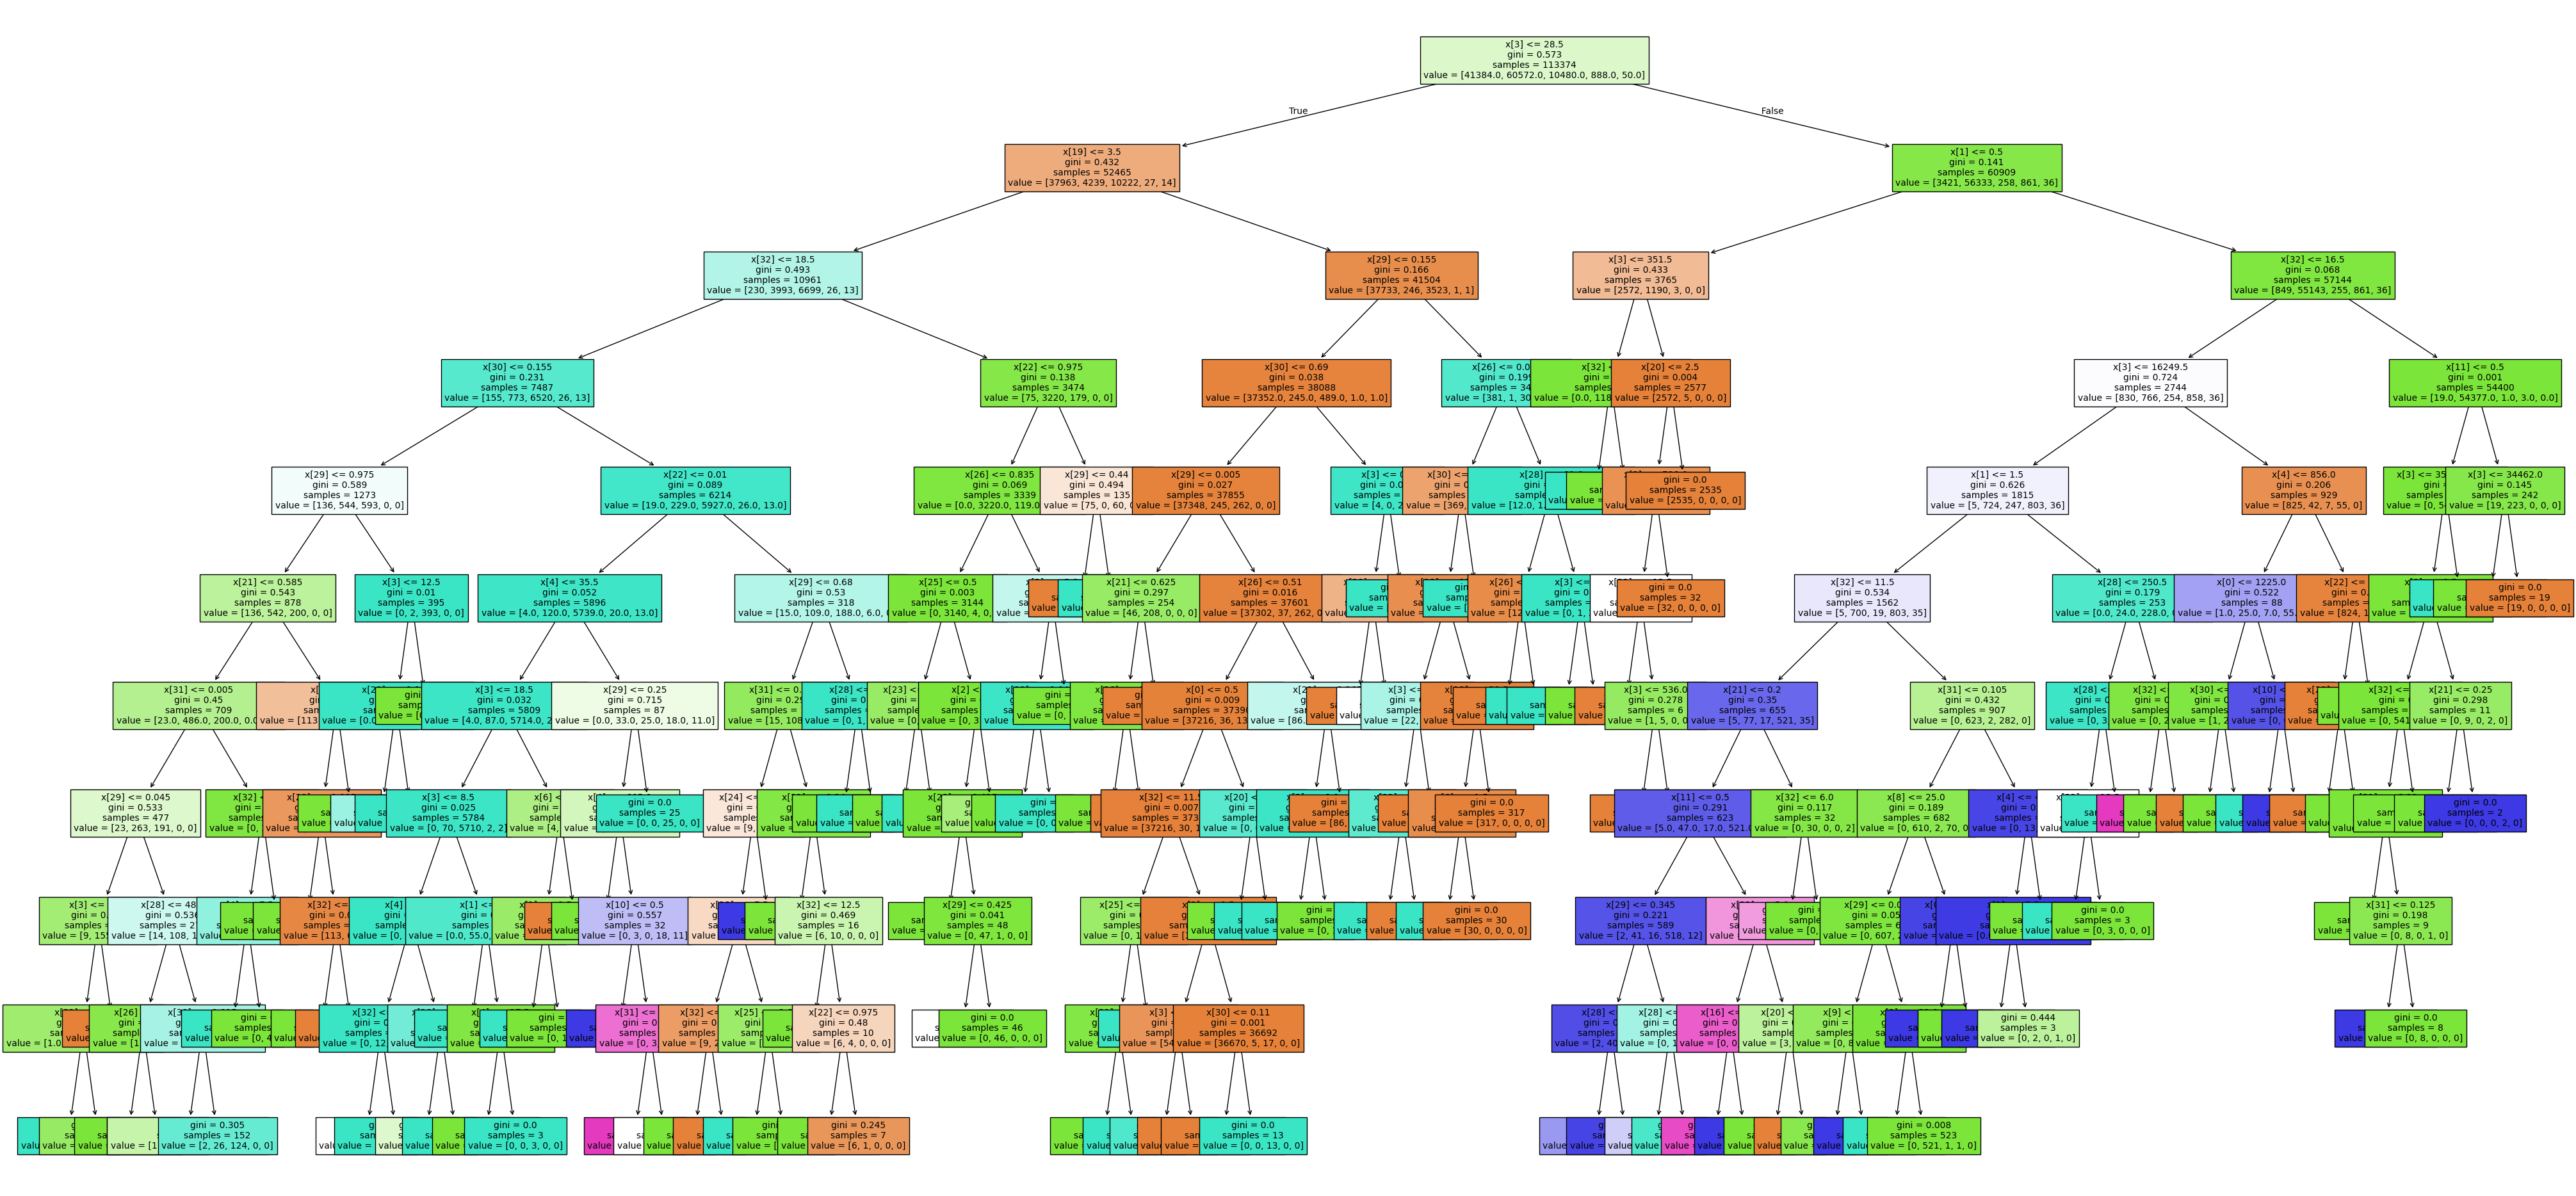

In [36]:
#Hiển thị cây quyết định bằng biểu đồ
from sklearn import tree
fig,ax = plt.subplots(figsize=(50,24))
tree.plot_tree(best_model,filled=True,fontsize=10)
plt.savefig("Decision_tree",dpi=100)
plt.show()

5.3 Random Forest

In [37]:
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Correct import
from sklearn.datasets import load_iris  # Import load_iris
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [38]:
df_copy = df.copy()
X = df_copy.drop(["Attack Type"], axis=1)
y = df_copy["Attack Type"]

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Định nghĩa bộ tham số cần tối ưu
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Thiết lập GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Huấn luyện mô hình với GridSearch
grid_search_rf.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_model = grid_search_rf.best_estimator_
print("Best Parameters:", grid_search_rf.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [40]:
# Đánh giá mô hình
rf_predict = best_model.predict(X_test)
rf_score = metrics.accuracy_score(y_test,rf_predict)
print("Độ chính xác:" ,rf_score)
print("Báo cáo: ",metrics.classification_report(y_test,rf_predict))

Độ chính xác: 0.999417866215072
Báo cáo:                precision    recall  f1-score   support

         dos       1.00      1.00      1.00     13941
      normal       1.00      1.00      1.00     20014
       probe       1.00      1.00      1.00      3526
         r2l       0.99      0.98      0.98       291
         u2r       0.88      0.75      0.81        20

    accuracy                           1.00     37792
   macro avg       0.97      0.95      0.96     37792
weighted avg       1.00      1.00      1.00     37792



In [41]:
# Tạo DataFrame từ kết quả GridSearchCV
cv_results = grid_search_rf.cv_results_
results_df = pd.DataFrame({
    'mean_test_score': cv_results['mean_test_score'],
    'param_n_estimators': cv_results['param_n_estimators'],
    'param_max_depth': cv_results['param_max_depth']
})

# Hiển thị DataFrame kết quả
print(results_df)

   mean_test_score  param_n_estimators param_max_depth
0         0.998979                  50            None
1         0.999059                 100            None
2         0.998911                  50            None
3         0.998923                 100            None
4         0.997981                  50              10
5         0.998095                 100              10
6         0.997993                  50              10
7         0.998095                 100              10


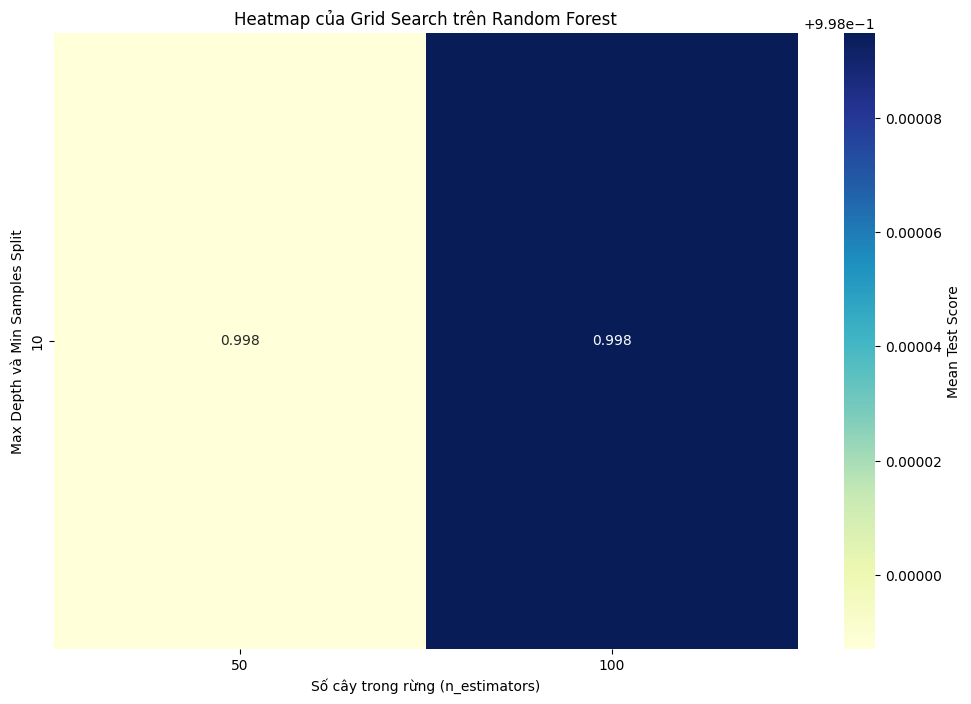

In [42]:
# Pivot dữ liệu để phù hợp với Heatmap
heatmap_data = results_df.pivot_table(
    index=['param_max_depth'],
    columns='param_n_estimators',
    values='mean_test_score'
)

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlGnBu",
    fmt=".3f",
    cbar_kws={'label': 'Mean Test Score'}
)
plt.title("Heatmap của Grid Search trên Random Forest")
plt.xlabel('Số cây trong rừng (n_estimators)')
plt.ylabel('Max Depth và Min Samples Split')
plt.show()

<ipython-input-43-83f7f60b5b0a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


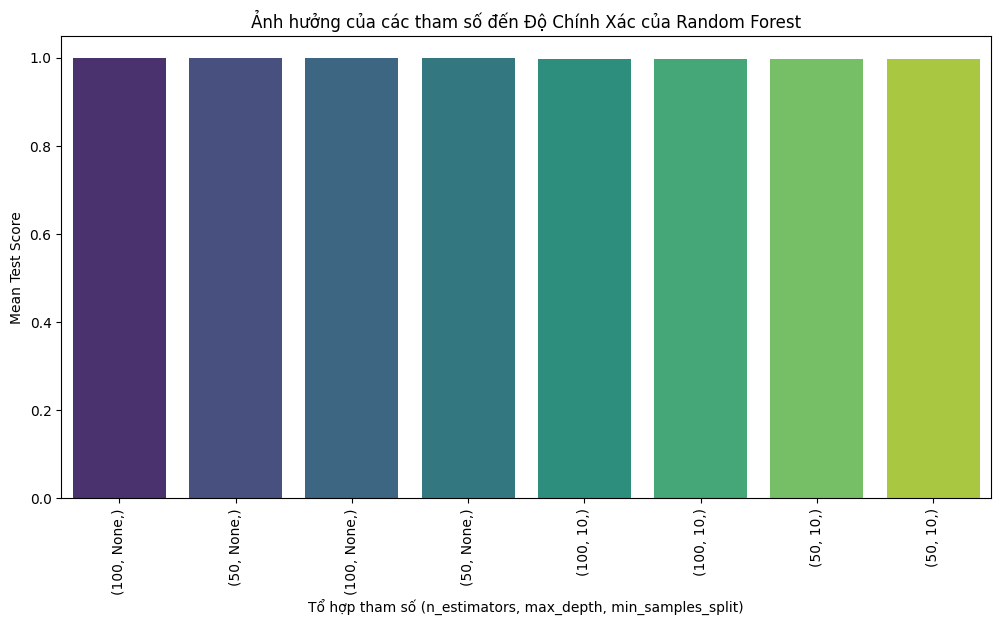

In [43]:
# Sắp xếp kết quả theo mean_test_score để dễ dàng trực quan
sorted_results_rf = results_df.sort_values(by='mean_test_score', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(
    x=range(len(sorted_results_rf)),  # Tạo chỉ mục cho trục X
    y=sorted_results_rf['mean_test_score'],  # Điểm số trung bình
    palette='viridis'
)

# Đánh dấu các tham số trên trục X
plt.xticks(
    range(len(sorted_results_rf)),
    sorted_results_rf.apply(lambda x: f"({x['param_n_estimators']}, {x['param_max_depth']},)", axis=1),
    rotation=90
)

# Thêm tiêu đề và nhãn
plt.title("Ảnh hưởng của các tham số đến Độ Chính Xác của Random Forest")
plt.xlabel("Tổ hợp tham số (n_estimators, max_depth, min_samples_split)")
plt.ylabel("Mean Test Score")
plt.show()

#5.4 LOGISTIC REGRESSION

In [44]:
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn import metrics
import pandas as pd

In [45]:
df_copy = df.copy()
X = df_copy.drop(["Attack Type"], axis=1)
y = df_copy["Attack Type"]

# Scale features for Logistic Regression
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [46]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# Khởi tạo mô hình Logistic Regression
lr = LogisticRegression(max_iter=200, random_state=42)

# Thiết lập GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Huấn luyện mô hình với GridSearch
grid_search_lr.fit(X_train, y_train)
# In ra các tham số tốt nhất
print("Mô hình tốt nhất:", grid_search_lr.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mô hình tốt nhất: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [47]:
# Đánh giá mô hình
lr_predict = grid_search_lr.predict(X_test)
lr_score = metrics.accuracy_score(y_test, lr_predict)
print("Độ chính xác:", lr_score)
print("Báo cáo: \n", metrics.classification_report(y_test, lr_predict))

Độ chính xác: 0.9707080863674852
Báo cáo: 
               precision    recall  f1-score   support

         dos       0.98      0.98      0.98     13941
      normal       0.97      0.98      0.97     20014
       probe       0.92      0.91      0.92      3526
         r2l       0.85      0.83      0.84       291
         u2r       0.82      0.45      0.58        20

    accuracy                           0.97     37792
   macro avg       0.91      0.83      0.86     37792
weighted avg       0.97      0.97      0.97     37792



In [48]:
# Lấy kết quả từ GridSearchCV
results_lr = grid_search_lr.cv_results_

# Tạo DataFrame từ kết quả
results_df_lr = pd.DataFrame({
    'mean_test_score': results_lr['mean_test_score'],
    'param_C': results_lr['param_C'],
    'param_penalty': results_lr['param_penalty'],
    'param_solver': results_lr['param_solver']
})

# Hiển thị DataFrame
print(results_df_lr)

   mean_test_score  param_C param_penalty param_solver
0         0.964142      0.1            l2    liblinear
1         0.971161      1.0            l2    liblinear
2         0.973770     10.0            l2    liblinear


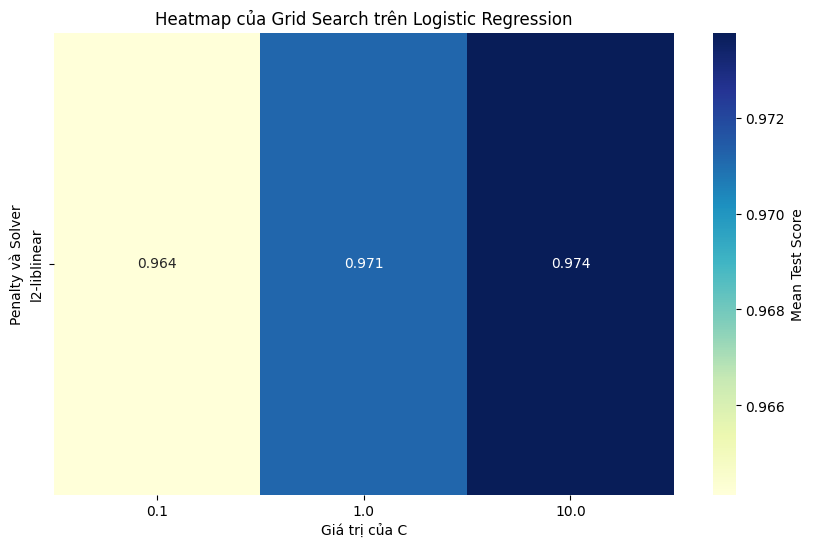

In [49]:
# Pivot dữ liệu để tạo heatmap
heatmap_data_lr = results_df_lr.pivot_table(
    index=['param_penalty', 'param_solver'],
    columns='param_C',
    values='mean_test_score'
)

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data_lr,
    annot=True,
    cmap="YlGnBu",
    fmt=".3f",
    cbar_kws={'label': 'Mean Test Score'}
)
plt.title("Heatmap của Grid Search trên Logistic Regression")
plt.xlabel('Giá trị của C')
plt.ylabel('Penalty và Solver')
plt.show()

<ipython-input-50-4014358ac06b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


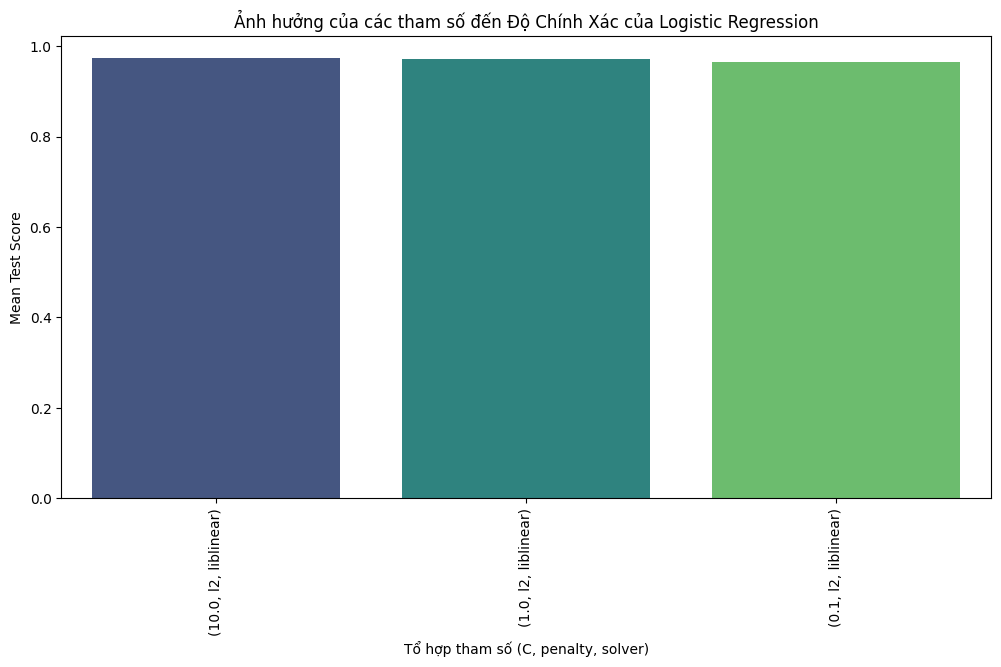

In [50]:
# Sắp xếp kết quả theo mean_test_score để dễ dàng trực quan
sorted_results_lr = results_df_lr.sort_values(by='mean_test_score', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(
    x=range(len(sorted_results_lr)),  # Tạo chỉ mục cho trục X
    y=sorted_results_lr['mean_test_score'],  # Điểm số trung bình
    palette='viridis'
)

# Đánh dấu các tham số trên trục X
plt.xticks(
    range(len(sorted_results_lr)),
    sorted_results_lr.apply(lambda x: f"({x['param_C']}, {x['param_penalty']}, {x['param_solver']})", axis=1),
    rotation=90
)

# Thêm tiêu đề và nhãn
plt.title("Ảnh hưởng của các tham số đến Độ Chính Xác của Logistic Regression")
plt.xlabel("Tổ hợp tham số (C, penalty, solver)")
plt.ylabel("Mean Test Score")
plt.show()

# So sánh độ chính xác của các thuật toán


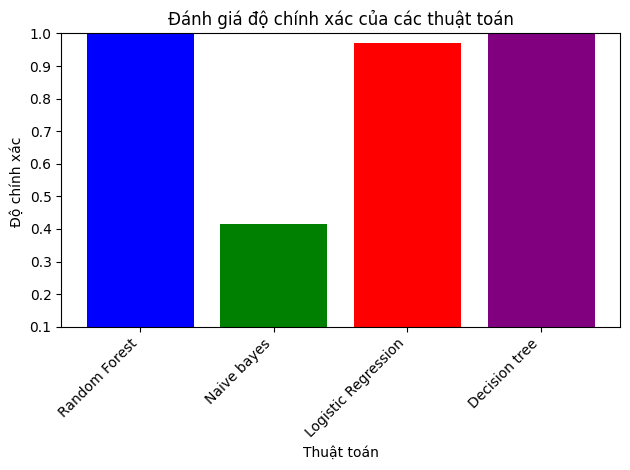

In [51]:
# đánh giá độ chinh xác các thuật toán
du_lieu = {'Random Forest':rf_score,'Naive bayes' :accuracy_nb , 'Logistic Regression': lr_score,'Decision tree':clfd_score}
danh_sach_ten = list(du_lieu.keys())
danh_sach_gia_tri = list(du_lieu.values())
colors = ['blue', 'green', 'red', 'purple']
plt.bar(danh_sach_ten, danh_sach_gia_tri, color=colors)

plt.xlabel('Thuật toán')
plt.ylabel('Độ chính xác ')

# Đặt tiêu đề cho biểu đồ
plt.title('Đánh giá độ chính xác của các thuật toán')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0.1, 1.0)
# Hiển thị biểu đồ
plt.show()